The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.

We provide the data both in .ods and in .xlsx formats.
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_boston
from matplotlib import rcParams
rcParams['patch.force_edgecolor'] = True
rcParams['patch.facecolor'] = 'b'
plt.style.use('seaborn')
%matplotlib inline

In [2]:
!ls

CCPP
CCPP.zip
Combined Cycle Power Plant.ipynb
Ecommerce Customers
LiearRegression.ipynb
Linear Regression - Project Exercise - Solutions.ipynb
Linear Regression - Project Exercise .ipynb
Linear Regression with Python.ipynb
USA_Housing.csv
ecommerceCustomersPMI
ecommerceScoringOut.txt


In [3]:
df = pd.read_excel('CCPP/Folds5x2_pp.xlsx')

In [4]:
df.rename(columns={'AT':'Ambient Temp', 'V':'Exhaust Vacuum', 'AP':'Ambient Pressure', 'RH':'Relative Humidity', 'PE':'Energy Output'}, inplace=True)

In [5]:
df.to_csv('CCPP/CombinedCyclePowerPlant.csv')

In [6]:
df.head()

,Ambient Temp,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Energy Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [7]:
df.tail()

,Ambient Temp,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Energy Output
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ambient Temp,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
Exhaust Vacuum,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
Ambient Pressure,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
Relative Humidity,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
Energy Output,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


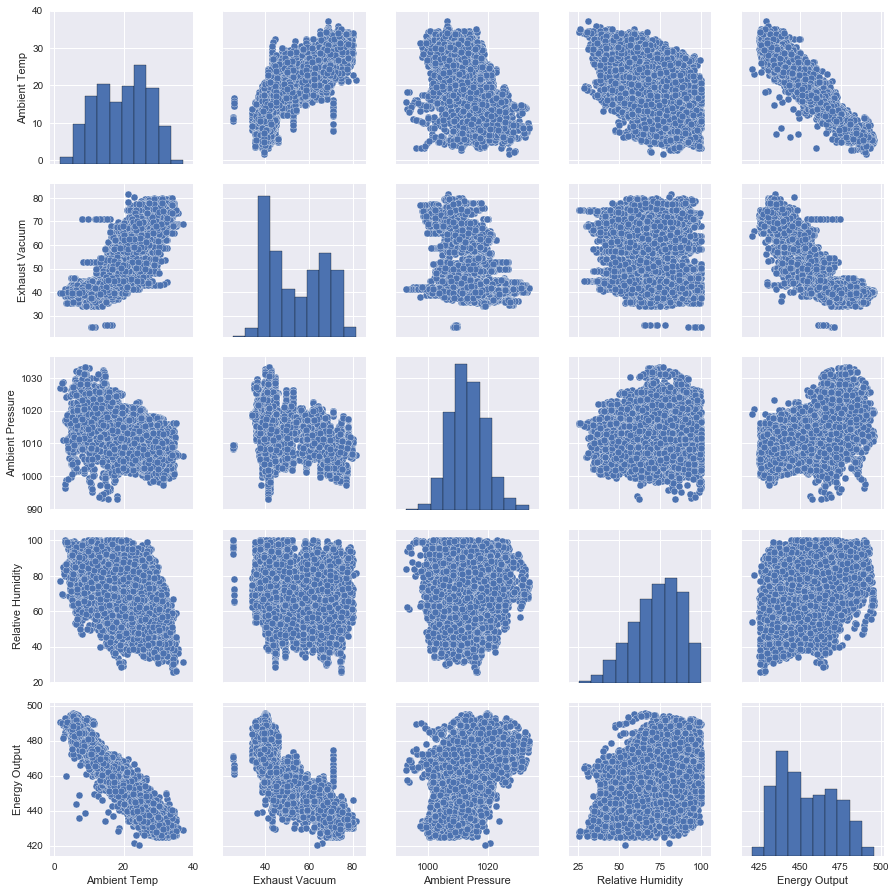

In [9]:
sns.pairplot(df)

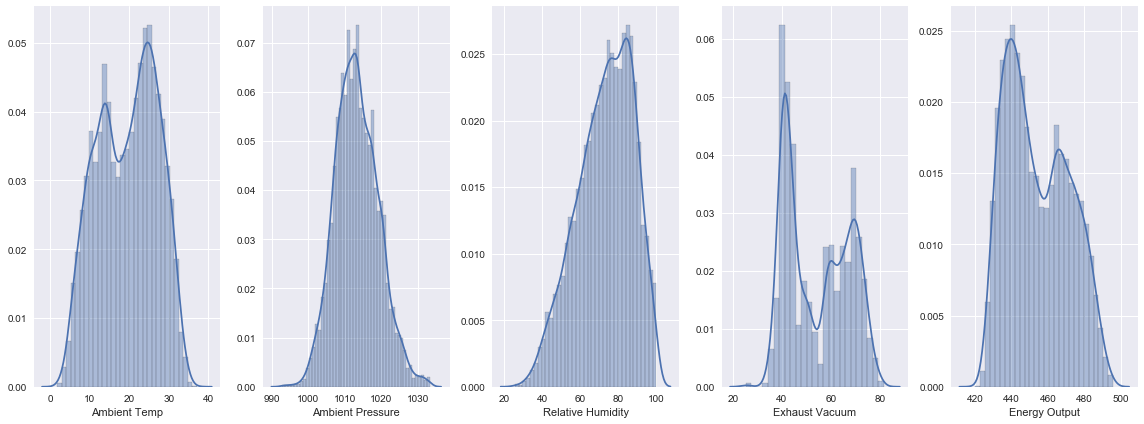

In [25]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(16,6))
sns.distplot(df['Ambient Temp'], ax=ax1)
sns.distplot(df['Ambient Pressure'], ax=ax2)
sns.distplot(df['Relative Humidity'], ax=ax3)
sns.distplot(df['Exhaust Vacuum'], ax=ax4)
sns.distplot(df['Energy Output'], ax=ax5)
plt.tight_layout()

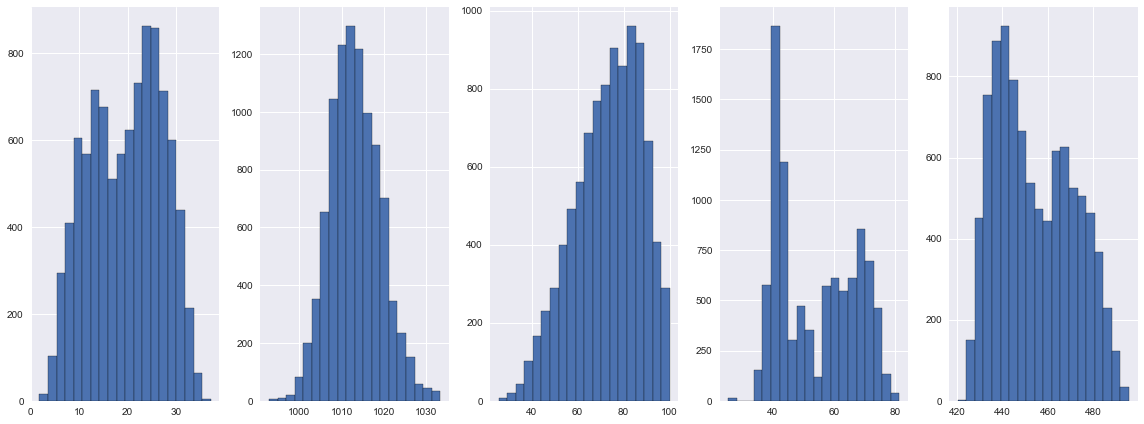

In [65]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(16,6))
ax1.hist(df['Ambient Temp'], bins=20)
ax2.hist(df['Ambient Pressure'], bins=20)
ax3.hist(df['Relative Humidity'], bins=20)
ax4.hist(df['Exhaust Vacuum'], bins=20)
ax5.hist(df['Energy Output'], bins=20)
plt.tight_layout()


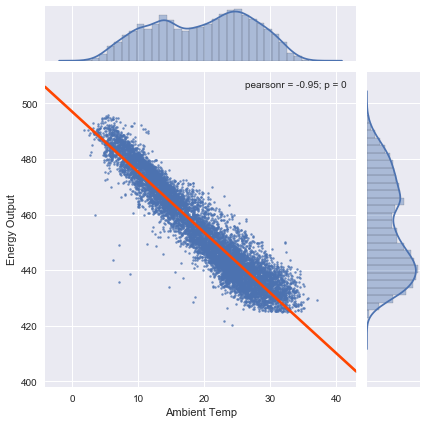

In [34]:
sns.jointplot(x='Ambient Temp', y='Energy Output', data=df, kind='reg', scatter_kws={"s": 6}, joint_kws={'line_kws':{'color':'orangered'}})

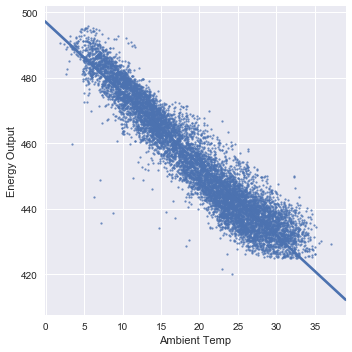

In [12]:
sns.lmplot(x='Ambient Temp', y='Energy Output', data=df, scatter_kws={"s": 5})

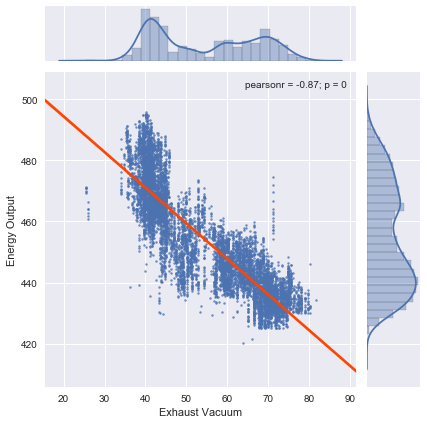

In [38]:
sns.jointplot(x='Exhaust Vacuum', y='Energy Output', data=df, kind='reg', scatter_kws={"s": 6}, joint_kws={'line_kws':{'color':'orangered'}})

In [39]:
df.corr()

,Ambient Temp,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Energy Output
Ambient Temp,1.000000,0.844107,-0.507549,-0.542535,-0.948128
Exhaust Vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
Ambient Pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
Relative Humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
Energy Output,-0.948128,-0.869780,0.518429,0.389794,1.000000


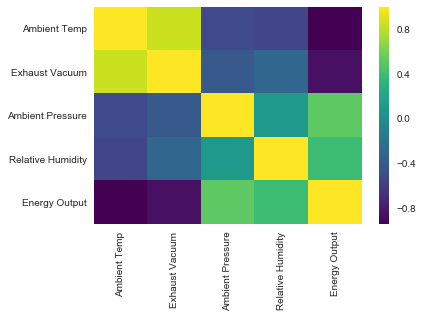

In [38]:
sns.heatmap(df.corr(), cmap='viridis')

In [14]:
X = df.drop(labels='Energy Output', axis=1)
y = df['Energy Output']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
print(lm.intercept_)

467.2634944812777


In [19]:
print(lm.coef_)

[-2.00154533 -0.22856444  0.04996956 -0.16072994]


In [59]:
coef = lm.coef_
coef[0]

-2.001545327032458

In [60]:
(c0, c1, c2, c3) = lm.coef_

In [61]:
c0

-2.001545327032458

In [49]:
for x in np.arange(len(lm.coef_)):
    print("x"+str(x)+" "+"="+ " " +str(lm.coef_[x]))

x0 = -2.001545327032458
x1 = -0.22856444091632266
x2 = 0.04996956317692258
x3 = -0.16072993633097465


In [55]:
d = {}
for x in np.arange(len(lm.coef_)):
     d["coef{0}".format(x)] = lm.coef_[x]

In [56]:
d

{'coef0': -2.001545327032458,
 'coef1': -0.22856444091632266,
 'coef2': 0.04996956317692258,
 'coef3': -0.16072993633097465}

In [20]:
cdf = pd.DataFrame(lm.coef_, index=X.columns, columns=['Coeff'])
cdf

,Coeff
Ambient Temp,-2.001545
Exhaust Vacuum,-0.228564
Ambient Pressure,0.049970
Relative Humidity,-0.160730


In [21]:
predictions = lm.predict(X_test)

Text(0,0.5,'Predicted Y')

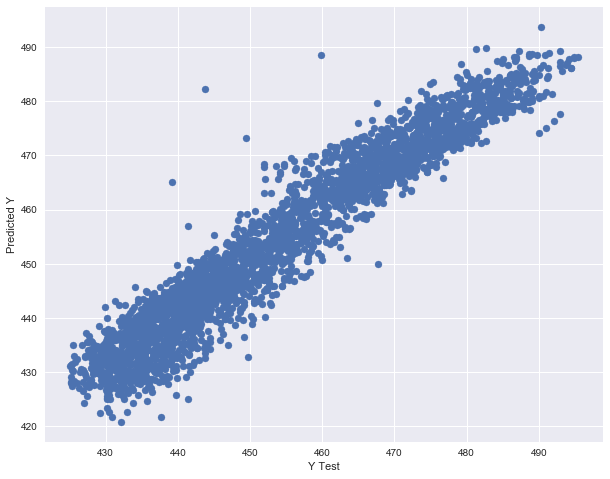

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(29.125,0.5,'Predicted Y')

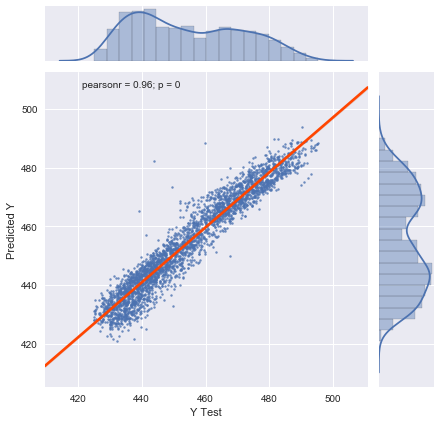

In [40]:
sns.jointplot(x=y_test, y=predictions, kind='reg', scatter_kws={"s": 6}, joint_kws={'line_kws':{'color':'orangered'}})
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

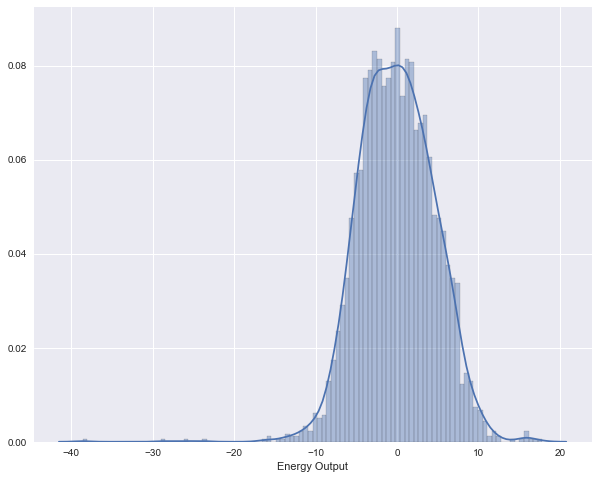

In [23]:
# plot the residuals
plt.figure(figsize=(10,8))
sns.distplot((y_test - predictions), bins=100)

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.664120377643752
MSE: 21.246921543137915
RMSE: 4.609438311024231


In [78]:
print(len(predictions))
print(len(y_test))

3158
3158


In [91]:
y_test.values

array([455.27, 436.31, 440.68, ..., 433.44, 470.46, 448.41])

In [96]:
predictions

array([455.62963361, 438.72924417, 434.14156621, ..., 428.87026751,
       469.78037233, 446.43264723])

In [99]:
lm.score(X_test, y_test)

0.9271761736761966